In [ ]:
import wandb
import pandas as pd
from tqdm import tqdm, trange
import matplotlib.pyplot as plt
import numpy as np

In [14]:
api = wandb.Api()
entity = "javiermarotomorales"  # set to your entity
projects = ['kdmc_sp0c20', 'kdmc_sm_rml2018', 'kdmc_sbasic', 'kdmc_sawgn2p', 'kdmc_sawgn']

skeys = ['test.acc', 'test.pgd-7_20dB_acc', '_timestamp', 'epoch']
ckeys = ['id', 'lr', 'atk', 'arch', 'loss', 'seed', 'sched', 'dataset', 'n_epochs', 'batch_size', 'dataset_size']

ddf = {}
for k in (skeys + ckeys):
    ddf[k] = []
for project in projects:
    runs = api.runs(entity + "/" + project)

    
    for run in tqdm(runs):
        for k in skeys:
            if k in run.summary:
                ddf[k].append(run.summary[k])
            else:
                ddf[k].append(None)
        for k in ckeys:
            if k in run.config:
                ddf[k].append(run.config[k])
            else:
                ddf[k].append(None)

runs_df = pd.DataFrame(ddf)

100%|██████████| 62/62 [00:00<00:00, 94.21it/s]


In [19]:
entity = "think-team"  # set to your entity
projects = ['kdmc_sp0c20', 'kdmc_sbasic', 'kdmc_sawgn2p']

skeys = ['test.acc', 'test.pgd-7_20dB_acc', '_timestamp', 'epoch']
ckeys = ['id', 'lr', 'atk', 'arch', 'loss', 'seed', 'sched', 'dataset', 'n_epochs', 'batch_size', 'dataset_size']

ddf = {}
for k in (skeys + ckeys):
    ddf[k] = []
for project in projects:
    runs = api.runs(entity + "/" + project)

    
    for run in tqdm(runs):
        for k in skeys:
            if k in run.summary:
                ddf[k].append(run.summary[k])
            else:
                ddf[k].append(None)
        for k in ckeys:
            if k in run.config:
                ddf[k].append(run.config[k])
            else:
                ddf[k].append(None)

runs_df = runs_df.append(pd.DataFrame(ddf))

100%|██████████| 6/6 [00:00<00:00, 15544.05it/s]
/tmp/ipykernel_57152/3060775290.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  runs_df = runs_df.append(pd.DataFrame(ddf))


In [24]:
runs_df = runs_df.sort_values('_timestamp', ascending=False)

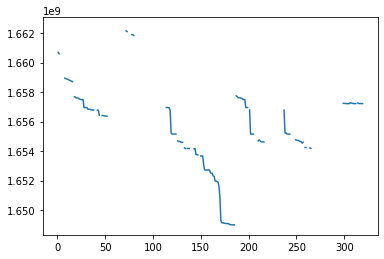

In [20]:
plt.plot(np.arange(len(runs_df)), runs_df._timestamp)

In [26]:
df = runs_df.loc[(runs_df._timestamp > 1.65e9) & (runs_df.epoch == runs_df.n_epochs)]
df

,test.acc,test.pgd-7_20dB_acc,_timestamp,epoch,id,lr,atk,arch,loss,seed,sched,dataset,n_epochs,batch_size,dataset_size
68,37.238980,8.946218,1.662259e+09,100.0,at,0.01,"[fgsm, 25, 1.25]",resnet,at,0.0,exp,sm_rml2018,100.0,1024.0,NaN
78,58.312392,0.577933,1.661892e+09,100.0,std_ml,0.01,"[pgd, Linf, 20, 0.25, 7]",resnet,std_ml,0.0,exp,sm_rml2018,100.0,1024.0,NaN
79,59.441205,0.849125,1.661891e+09,100.0,std,0.01,"[pgd, Linf, 20, 0.25, 7]",resnet,std,0.0,exp,sm_rml2018,100.0,1024.0,NaN
1,48.956649,45.568646,1.660700e+09,100.0,at_ml,0.01,"[pgd, Linf, 20, 0.25, 7]",resnet,at_ml,0.0,exp,sp0c20,100.0,1024.0,NaN
2,51.027951,43.582044,1.660597e+09,100.0,at_aml,0.01,"[pgd, Linf, 20, 0.25, 7]",resnet,at_aml,0.0,exp,sp0c20,100.0,1024.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,70.565934,29.868132,1.651968e+09,100.0,at_ml,0.10,"[pgd, Linf, 20, 0.25, 7]",resnet,at_ml,0.0,exp,sbasic,100.0,256.0,NaN
167,80.884615,11.472527,1.651926e+09,100.0,std,0.10,"[pgd, Linf, 20, 0.25, 7]",resnet,std,0.0,exp,sbasic,100.0,256.0,NaN
168,83.104396,15.846154,1.651898e+09,100.0,std_ml,0.10,"[pgd, Linf, 20, 0.25, 7]",resnet,std_ml,0.0,exp,sbasic,100.0,256.0,NaN
169,85.803846,23.784615,1.651619e+09,100.0,std,0.10,"[pgd, Linf, 20, 0.25, 7]",resnet,std,0.0,exp,sbasic,100.0,256.0,NaN


In [27]:
df.loc[df.dataset == 'sbasic']

,test.acc,test.pgd-7_20dB_acc,_timestamp,epoch,id,lr,atk,arch,loss,seed,sched,dataset,n_epochs,batch_size,dataset_size
7,83.353365,16.416266,1.657276e+09,100.0,std,0.01,"[pgd, Linf, 20, 0.25, 7]",resnet,std,0.0,exp,sbasic,100.0,1024.0,1000000.0
8,55.919471,51.552484,1.657254e+09,100.0,std_ml,0.01,"[pgd, Linf, 20, 0.25, 7]",resnet,at_ml,0.0,exp,sbasic,100.0,1024.0,1000000.0
9,55.248397,52.233574,1.657247e+09,100.0,std,0.01,"[pgd, Linf, 20, 0.25, 7]",resnet,at,0.0,exp,sbasic,100.0,1024.0,1000000.0
10,54.048583,44.028340,1.657226e+09,100.0,std_ml,0.01,"[pgd, Linf, 20, 0.25, 7]",resnet,at_ml,0.0,exp,sbasic,100.0,1024.0,100000.0
11,53.238866,44.635628,1.657225e+09,100.0,std,0.01,"[pgd, Linf, 20, 0.25, 7]",resnet,at,0.0,exp,sbasic,100.0,1024.0,100000.0
12,84.795673,18.559696,1.657221e+09,100.0,std_lnr,0.01,"[pgd, Linf, 20, 0.25, 7]",resnet,std_lnr,0.0,exp,sbasic,100.0,1024.0,1000000.0
13,84.845753,22.576122,1.657220e+09,100.0,std_ml,0.01,"[pgd, Linf, 20, 0.25, 7]",resnet,std_ml,0.0,exp,sbasic,100.0,1024.0,1000000.0
114,71.457490,13.056680,1.656955e+09,100.0,std_lnr,0.01,"[pgd, Linf, 20, 0.25, 7]",resnet,std_lnr,0.0,exp,sbasic,100.0,1024.0,100000.0
115,73.279352,14.979757,1.656955e+09,100.0,std_ml,0.01,"[pgd, Linf, 20, 0.25, 7]",resnet,std_ml,0.0,exp,sbasic,100.0,1024.0,100000.0
116,70.445344,9.919028,1.656955e+09,100.0,std,0.01,"[pgd, Linf, 20, 0.25, 7]",resnet,std,0.0,exp,sbasic,100.0,1024.0,100000.0


In [ ]:
# Latex code
get_line = lambda r: f"{r['dataset'][0]} & {r['arch'][0]}-d{int(1 / r['lwidth'][0])} & {r['sched'][0]}-{int(r['n_epochs'][0])} & ${r['test.acc']['mean']:.2f} \pm {r['test.acc']['std']:.2f}$ & ${r['test.autoattack_acc']['mean']:.2f} \pm {r['test.autoattack_acc']['std']:.2f}$ \\\\ \n"

with open('results.txt', 'w') as f:
    for i in trange(len(res)):
        r = res.iloc[i]
        f.write(get_line(r))